Fitting over both radial and angular direction. This is needed for the case of Kerr.

# Load Dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qnm
import glob
import h5py
from scipy.linalg import lstsq
from matplotlib.colors import LogNorm
from numpy.fft import *

# Pure qnm evo data from the TeukEvolution.jl

In [6]:
a0n0 = glob.glob("../data/TeukEvolution/pure_qnm/high_a0.0_n0/a0.0_nx512_ny40.npz")[0]
a0n3 = glob.glob("../data/TeukEvolution/pure_qnm/high_a0.0_n3/a0.0_nx512_ny40.npz")[0]
a999n0 = glob.glob("../data/TeukEvolution/pure_qnm/high_a0.999_n0/a0.999_nx512_ny40.npz")[0]
a999n3 = glob.glob("../data/TeukEvolution/pure_qnm/high_a0.999_n3/a0.999_nx512_ny40.npz")[0]
files = [a0n0,a0n3,a999n0,a999n3]
psi4s = []
dpsi4s = []
ts = []
rs = []
for i in range(4):
    psi4s.append(np.load(files[i])['psi4_l'])
    dpsi4s.append(np.load(files[i])['dt_psi4_l'])
    ts.append(np.load(files[i])['time'])
    rs.append(np.load(files[i])['rads'])

In [7]:
labels = ["a=0, n=0","a=0, n=3","a=0.999, n=0","a=0.999, n=3"]

In [8]:
mode_seq = qnm.modes_cache(s=-2,l=2,m=2,n=0)
omega00, lam, C = mode_seq(a=0)

omega9990, lam, C = mode_seq(a=0.999)

mode_seq = qnm.modes_cache(s=-2,l=2,m=2,n=3)
omega03, lam, C = mode_seq(a=0)

omega9993, lam, C = mode_seq(a=0.999)

omegas = [omega00,omega03,omega9990,omega9993]

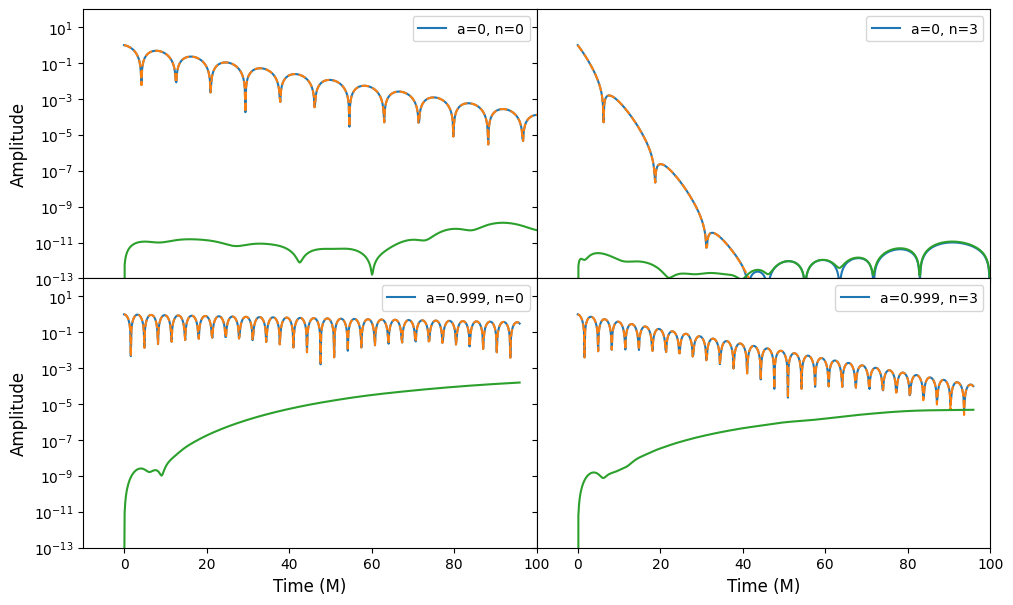

In [9]:
plt.rcParams['axes.labelsize']=12
plt.rcParams['axes.titlesize']=12

fig, (row1,row2) = plt.subplots(nrows=2,ncols=2, figsize = (10,6),sharex=True,sharey=True,\
                               gridspec_kw={'width_ratios':[1,1]})
for i in range(2):
    pcm = row1[i].plot(ts[i],np.abs((psi4s[i][0,:,0]/psi4s[i][0,0,0]).real),label = labels[i])
    row1[i].plot(ts[i],np.abs(np.exp(-1j*omegas[i]*ts[i]).real),'--')
    row1[i].plot(ts[i],np.abs((psi4s[i][0,:,0]/psi4s[i][0,0,0])-np.exp(-1j*omegas[i]*ts[i])))

    row1[i].legend()
    row1[i].set_yscale('log')
    row1[i].set_ylim(1e-13,1e2)
    row1[i].set_xlim(-10,100)
for j in range(2):
    i = j+2
    pcm = row2[j].plot(ts[i],np.abs((psi4s[i][0,:,0]/psi4s[i][0,0,0]).real),label = labels[i])
    row2[j].plot(ts[i],np.abs(np.exp(-1j*omegas[i]*ts[i]).real),'--')
    row2[j].plot(ts[i],np.abs((psi4s[i][0,:,0]/psi4s[i][0,0,0])-np.exp(-1j*omegas[i]*ts[i])))

    row2[j].legend()
    row2[j].set_yscale('log')
    row2[j].set_ylim(1e-13,1e2)
    row2[j].set_xlim(-10,100)
fig.tight_layout()
row1[0].set_ylabel("Amplitude")
row2[0].set_ylabel("Amplitude")

row2[0].set_xlabel("Time (M)")
row2[1].set_xlabel("Time (M)")

plt.subplots_adjust(wspace=0,hspace=0)
plt.savefig("../figures/pure_qnm_evo.png",dpi=100, bbox_inches='tight')